# List All Unique cities where customers are located

In [2]:
from SQLHelper import run_query
import pandas as pd
from IPython.display import display

query = 'SELECT DISTINCT(customer_city) FROM customers'
df = run_query(query)
pd.set_option("display.max_rows",None)
display(df)

,customer_city
0,abadia dos dourados
1,agua boa
2,agua clara
3,agua comprida
4,aguas de lindoia
5,alegrete
6,alfenas
7,alfredo chaves
8,alfredo marcondes
9,alfredo vasconcelos


# Count the number of orders placed in 2017.

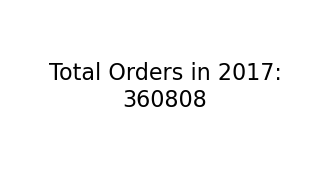

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from SQLHelper import run_query

# Run SQL Query
query = """SELECT COUNT(*) AS Total_Order_2017 
           FROM orders 
           WHERE YEAR(order_purchase_timestamp) = 2017"""
df = run_query(query)

# Extract the count
total_orders_2017 = df.iloc[0, 0]

# Display as Text
plt.figure(figsize=(4, 2))
plt.text(0.5, 0.5, f"Total Orders in 2017:\n{total_orders_2017}", fontsize=16, ha="center", va="center")
plt.axis("off")  # Hide axes
plt.show()


# Find the total sales per category (TOP 5)

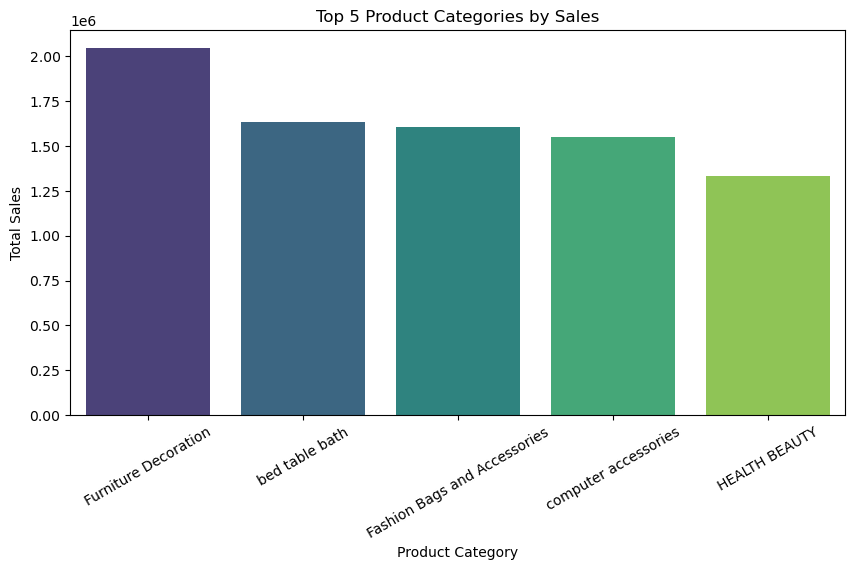

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from SQLHelper import run_query

query = """SELECT TOP 5 products.[product category] ,CAST(SUM(order_items.price) AS decimal(18,2)) AS [Total Sales]
FROM payments JOIN order_items ON payments.order_id = order_items.order_id
JOIN products ON products.product_id = order_items.product_id
GROUP BY products.[product category]
ORDER BY [Total Sales] DESC;"""
df = run_query(query)

# Plot Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=df["product category"], y=df["Total Sales"], hue=df["product category"], palette="viridis", legend=False)
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Top 5 Product Categories by Sales")
plt.xticks(rotation=30)
plt.show()

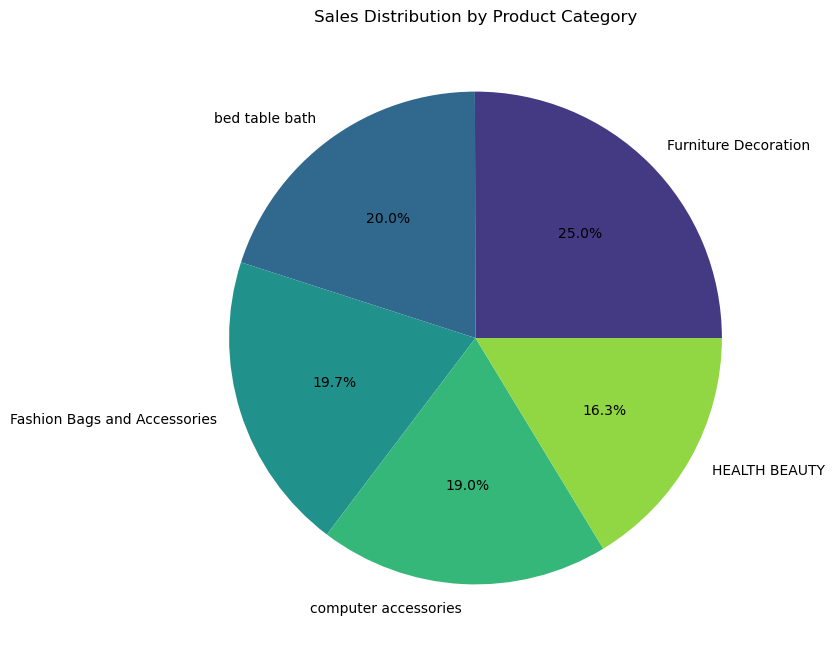

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from SQLHelper import run_query

query = """SELECT TOP 5 products.[product category] ,CAST(SUM(order_items.price) AS decimal(18,2)) AS [Total Sales]
FROM payments JOIN order_items ON payments.order_id = order_items.order_id
JOIN products ON products.product_id = order_items.product_id
GROUP BY products.[product category]
ORDER BY [Total Sales] DESC;"""
df = run_query(query)

# plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(df["Total Sales"], labels=df["product category"], autopct="%1.1f%%", colors=sns.color_palette("viridis", len(df)))
plt.title("Sales Distribution by Product Category")
plt.show()

# Calculate the percentage of orders that were paid in installments.

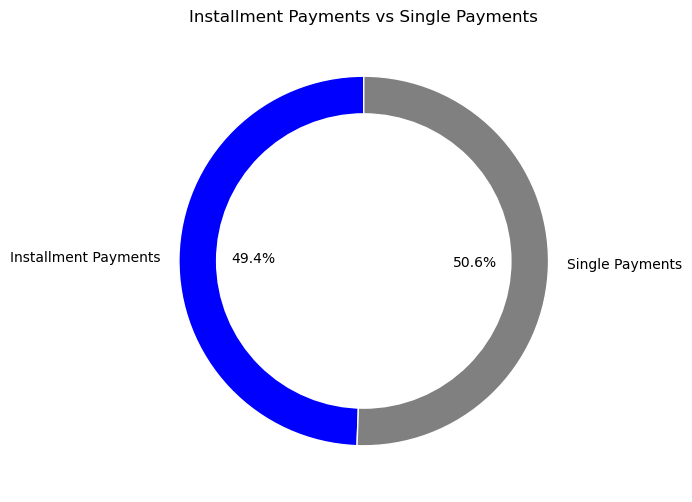

In [16]:
from SQLHelper import run_query
import pandas as pd
import matplotlib.pyplot as plt

query = """SELECT 
    CAST(
        (COUNT(CASE WHEN payment_installments > 1 THEN 1 END) * 100.0) / COUNT(*) 
        AS DECIMAL(18,2)
    ) AS Installment_Percentage
FROM payments;"""
df = run_query(query)
installment_percentage = df.iloc[0, 0]

# Pie chart data
labels = ["Installment Payments", "Single Payments"]
sizes = [installment_percentage, 100 - installment_percentage]
colors = ["blue", "gray"]

# Create Donut Chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "white"})
plt.gca().add_artist(plt.Circle((0, 0), 0.8 , fc="white"))  # Create donut effect
plt.title("Installment Payments vs Single Payments")
plt.show()

# Count the number of customers from each state.

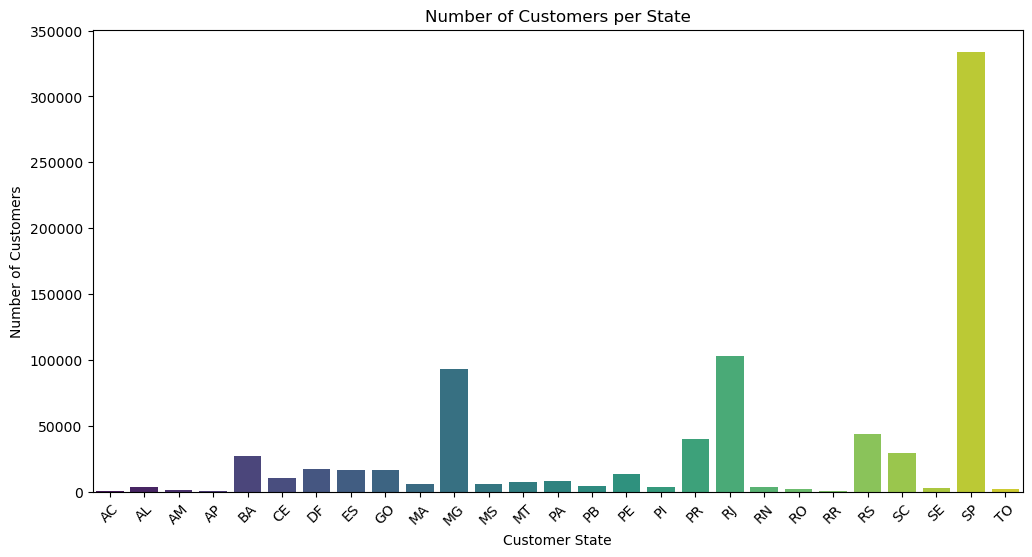

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from SQLHelper import run_query

# SQL Query
query = """SELECT customer_state, COUNT(*) as customer_count
FROM customers
GROUP BY customer_state;"""

# Fetch Data
df = run_query(query)

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=df["customer_state"], y=df["customer_count"], hue=df["customer_state"], palette="viridis", legend=False)
plt.xlabel("Customer State")
plt.ylabel("Number of Customers")
plt.title("Number of Customers per State")
plt.xticks(rotation=45)  
plt.show()